# Basic Analysis
This notebook shows how to parse the various raw data files and prepare simple figures.

In [1]:
import ipywidgets
from matplotlib import pyplot
import pandas
import pathlib

import bletl

DP_DATA = pathlib.Path("..", "data")
DP_RESULTS = pathlib.Path("..", "results")

## Parsing the raw data

In [2]:
bldata = bletl.parse(DP_DATA / "8X4PF4.csv")
bldata

BLData(model=BLPro) {
  "BS3": FilterTimeSeries(112 cycles, 48 wells),
  "pH": FilterTimeSeries(112 cycles, 48 wells),
  "DO": FilterTimeSeries(112 cycles, 48 wells),
}

In [3]:
df_inductions = pandas.read_excel(
    DP_DATA / "8X4PF4_eventlog.xlsx",
    index_col=0, sheet_name="inductions"
).set_index("well").sort_index()
df_inductions.head()

,timestamp,time,cycle,volume,harvesttime
well,,,,,
A01,2020-07-21T04:04:43.072Z,8.987120,42,10,12.987120
A02,2020-07-21T02:47:12.518Z,7.695299,36,10,11.695299
A03,2020-07-21T04:04:43.118Z,8.987132,42,10,12.987132
A04,2020-07-21T04:04:43.147Z,8.987140,42,10,12.987140
A05,2020-07-21T02:20:45.384Z,7.254428,34,10,11.254428


In [4]:
df_samplings = pandas.read_excel(
    DP_DATA / "8X4PF4_eventlog.xlsx",
    index_col=0, sheet_name="samplings"
).set_index("well").sort_index()

# Uncomment the next block for the LaTeX formatted table
#print(df_samplings.head().to_latex(
#    label="tab_samplings",
#    bold_rows=True,
#    caption="Excerpt of sampling event log"
#))

df_samplings.head()

,timestamp,time,cycle,volume,supernatant_well
well,,,,,
A01,2020-07-21T08:10:04.721Z,13.076466,61,-950,H01
A02,2020-07-21T07:05:04.299Z,11.993016,56,-950,G01
A03,2020-07-21T08:10:04.786Z,13.076485,61,-950,F01
A04,2020-07-21T08:10:04.841Z,13.076500,61,-950,E01
A05,2020-07-21T06:26:17.384Z,11.346651,53,-950,D01


## Example 1: Process variables with annotations

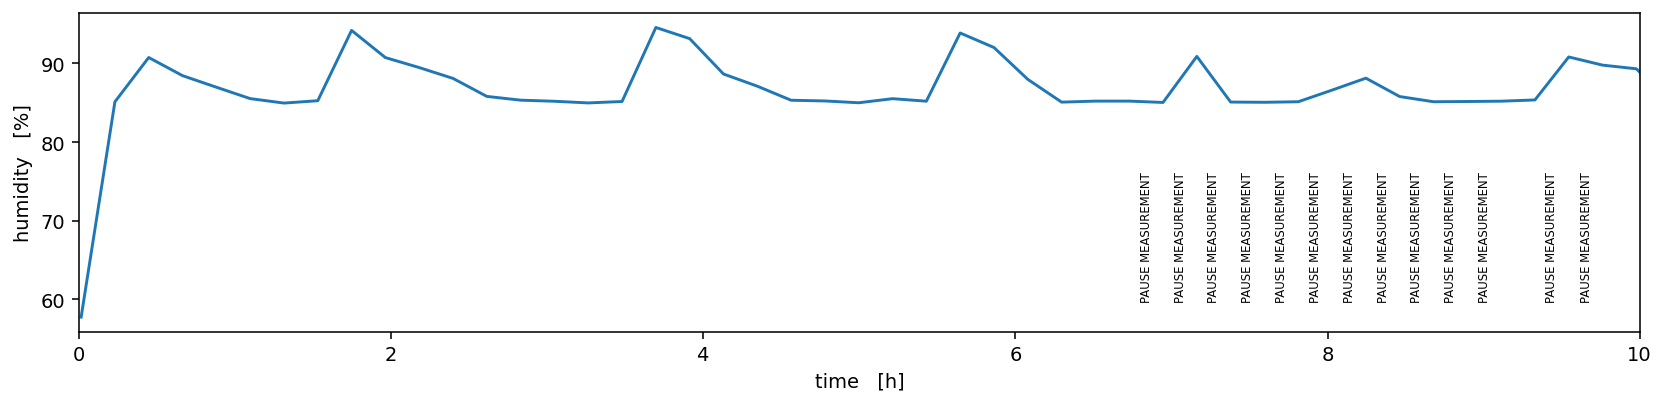

In [5]:
fig, ax = pyplot.subplots(dpi=140, figsize=(12,3))

ax.plot(
    bldata.environment.time,
    bldata.environment["humidity"],
)

for row in bldata.comments.itertuples():
    if row.sys_comment == "PAUSE MEASUREMENT":
        ax.text(
            row.time, 60, row.sys_comment,
            rotation=90, fontsize=6
        )
        
ax.set(
    xlabel="time   [h]",
    ylabel="humidity   [%]",
    xlim=(0, 10)
)

fig.tight_layout()
fig.savefig(DP_RESULTS / "fig_environment_events.png")
fig.savefig(DP_RESULTS / "fig_environment_events.pdf")
pyplot.show()

## Example 2: Interactive plot of measurements

In [6]:
def plot_custom(wells="A01,A02,B01", filterset="DO"):
    fig, ax = pyplot.subplots(dpi=140, figsize=(12,3))
    
    for well in wells.split(","):
        if not well in bldata[filterset].value.columns:
            # can't plot wells that don't exist
            continue

        t, y = bldata.get_timeseries(
            filterset,
            well,
            last_cycle=df_samplings.loc[well, "cycle"]
        )
        ax.plot(t, y, label=well)

    ax.legend()
    ax.set(
        xlabel="time   [h]",
        ylabel=filterset
    )
    pyplot.show()
    
ipywidgets.interact(
    plot_custom,
    filterset=bldata.keys()
);

interactive(children=(Text(value='A01,A02,B01', description='wells'), Dropdown(description='filterset', index=…

In [7]:
%load_ext watermark
%watermark

Last updated: 2021-07-30T13:22:09.579127+02:00

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.25.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 6
Architecture: 64bit

